# Report: Block Matrix Multiplication

Выполняя эту лабораторную работу, я рассмотрел блочное и поточечное умножение квадратных матриц.
<br> Программа написана на языке C++. С помощью openmp мной была реализована многопоточность.
<br> Также для запуска были использованы batch-скрипты.

Ниже приведены некоторые результаты при различных значениях параметров $n$ (порядок матрицы), $r$ (размер блока), $t$ (количество потоков).
<br>Получены результаты для матриц порядка $n = 600, 1000, 2000$ и для $r = 1, 5, 10, 20, 50, 100, 200$.
<br>Что касается числа потоков, рассматривались значения 1, 2 и 4. 
<br>Компьютер, на котором я выполнял работу, имеет 2 процессорных ядра, потому случай $r=4$ рассматривался больше из любопытства.

Рассмотрим, как количество потоков влияет на время работы трёх алгоритмов (последовательного, с распараллеленным внешним и распараллеленным внутренним циклами) при фиксированных значениях $n$ и $r$.
<br>Первый случай, $n = 600$, $r = 1$.
<br>Второй случай, $n = 1000, r = 125$.

## Number of threads analysis

### matrix 600x600

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  num of threads</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">               1.911</td><td style="text-align: right;">                        1.723</td><td style="text-align: right;">                        1.976</td><td style="text-align: right;">               1</td></tr>
<tr><td style="text-align: right;">               1.918</td><td style="text-align: right;">                        1.082</td><td style="text-align: right;">                        1.29 </td><td style="text-align: right;">               2</td></tr>
<tr><td style="text-align: right;">               1.282</td><td style="text-align: right;">                        0.766</td><td style="text-align: right;">                        0.724</td><td style="text-align: right;">               4</td></tr>
</tbody>
</table>

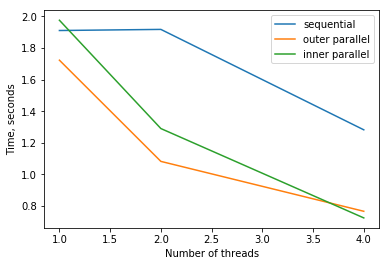

### matrix 1000x1000

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  num of threads</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">              14.886</td><td style="text-align: right;">                        9.57 </td><td style="text-align: right;">                        5.675</td><td style="text-align: right;">               1</td></tr>
<tr><td style="text-align: right;">               5.387</td><td style="text-align: right;">                        3.227</td><td style="text-align: right;">                        3.434</td><td style="text-align: right;">               2</td></tr>
<tr><td style="text-align: right;">               5.47 </td><td style="text-align: right;">                        4.011</td><td style="text-align: right;">                        3.209</td><td style="text-align: right;">               4</td></tr>
</tbody>
</table>

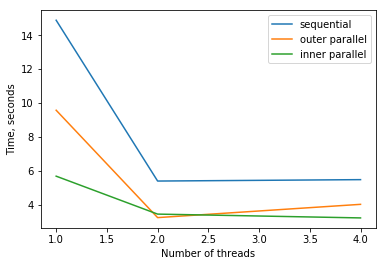

In [8]:
import numpy as np
from IPython.display import display, Markdown
from tabulate import tabulate
import matplotlib.pyplot as plot

headers = ['sequential time, s', 'parallel outer loop time, s', 'parallel inner loop time, s', 'num of threads']
display(Markdown('## Number of threads analysis'))

file = open('E:\\Work\\ФПМИ\\!7. Параллельные и распределённые вычисления\\matrix\\lab1\\out.txt', 'r')
for line in file:
    dimension, rows = map(int, line.split())
    title = 'matrix {}x{}'.format(dimension, dimension)
    display(Markdown('### {}'.format(title)))
    table = [file.readline().split() for _ in range(rows)]
    display(Markdown(tabulate(table, headers, tablefmt='html')))
    
    data = np.array(table)
    labels = ['sequential', 'outer parallel', 'inner parallel']
    threads_num = list(map(int, data[:,3]))
    plot.xlabel('Number of threads')
    plot.ylabel('Time, seconds')
    plots = []
    for i in range(0, 3):
        plots.append(plot.plot(threads_num,  list(map(float, data[:,i])), label=labels[i])[0])
    plot.legend(handles=plots)
    plot.show()

## Size of block analysis

### matrix 750x750

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  block size</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">               6.377</td><td style="text-align: right;">                        4.056</td><td style="text-align: right;">                        3.849</td><td style="text-align: right;">           1</td></tr>
<tr><td style="text-align: right;">               3.093</td><td style="text-align: right;">                        1.591</td><td style="text-align: right;">                        1.612</td><td style="text-align: right;">           5</td></tr>
<tr><td style="text-align: right;">               2.735</td><td style="text-align: right;">                        1.501</td><td style="text-align: right;">                        1.432</td><td style="text-align: right;">          10</td></tr>
<tr><td style="text-align: right;">               2.312</td><td style="text-align: right;">                        1.222</td><td style="text-align: right;">                        1.229</td><td style="text-align: right;">          25</td></tr>
<tr><td style="text-align: right;">               2.256</td><td style="text-align: right;">                        1.199</td><td style="text-align: right;">                        1.222</td><td style="text-align: right;">          50</td></tr>
<tr><td style="text-align: right;">               2.797</td><td style="text-align: right;">                        1.442</td><td style="text-align: right;">                        1.455</td><td style="text-align: right;">         125</td></tr>
</tbody>
</table>

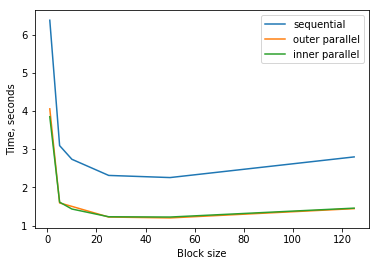

### matrix 1000x1000

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  block size</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">              11.343</td><td style="text-align: right;">                       11.741</td><td style="text-align: right;">                       11.967</td><td style="text-align: right;">           1</td></tr>
<tr><td style="text-align: right;">               6.707</td><td style="text-align: right;">                        3.555</td><td style="text-align: right;">                        4.076</td><td style="text-align: right;">           5</td></tr>
<tr><td style="text-align: right;">               6.492</td><td style="text-align: right;">                        3.216</td><td style="text-align: right;">                        3.851</td><td style="text-align: right;">          10</td></tr>
<tr><td style="text-align: right;">               5.645</td><td style="text-align: right;">                        2.795</td><td style="text-align: right;">                        3.291</td><td style="text-align: right;">          25</td></tr>
<tr><td style="text-align: right;">               5.907</td><td style="text-align: right;">                        2.792</td><td style="text-align: right;">                        3.323</td><td style="text-align: right;">          50</td></tr>
<tr><td style="text-align: right;">               7.75 </td><td style="text-align: right;">                        3.798</td><td style="text-align: right;">                        4.376</td><td style="text-align: right;">         125</td></tr>
</tbody>
</table>

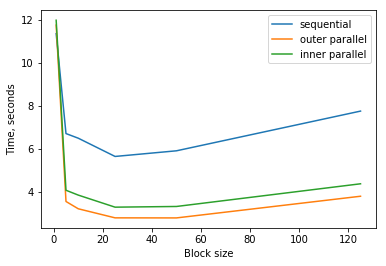

### matrix 1500x1500

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  block size</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">              75.349</td><td style="text-align: right;">                       44.952</td><td style="text-align: right;">                       45.827</td><td style="text-align: right;">           1</td></tr>
<tr><td style="text-align: right;">              25.616</td><td style="text-align: right;">                       14.282</td><td style="text-align: right;">                       15.339</td><td style="text-align: right;">           5</td></tr>
<tr><td style="text-align: right;">              22.808</td><td style="text-align: right;">                       12.155</td><td style="text-align: right;">                       12.538</td><td style="text-align: right;">          10</td></tr>
<tr><td style="text-align: right;">              20.632</td><td style="text-align: right;">                       10.842</td><td style="text-align: right;">                       11.03 </td><td style="text-align: right;">          25</td></tr>
<tr><td style="text-align: right;">              17.508</td><td style="text-align: right;">                       11.08 </td><td style="text-align: right;">                       10.661</td><td style="text-align: right;">          50</td></tr>
<tr><td style="text-align: right;">              23.386</td><td style="text-align: right;">                       13.811</td><td style="text-align: right;">                       13.84 </td><td style="text-align: right;">         125</td></tr>
</tbody>
</table>

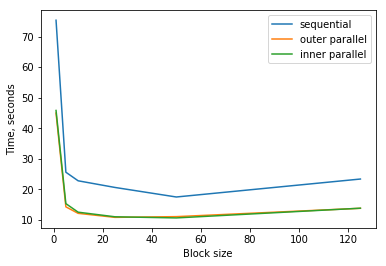

### matrix 2000x2000

<table>
<thead>
<tr><th style="text-align: right;">  sequential time, s</th><th style="text-align: right;">  parallel outer loop time, s</th><th style="text-align: right;">  parallel inner loop time, s</th><th style="text-align: right;">  block size</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">             141.378</td><td style="text-align: right;">                       88.617</td><td style="text-align: right;">                       88.535</td><td style="text-align: right;">           1</td></tr>
<tr><td style="text-align: right;">              58.02 </td><td style="text-align: right;">                       32.007</td><td style="text-align: right;">                       32.787</td><td style="text-align: right;">           5</td></tr>
<tr><td style="text-align: right;">              51.491</td><td style="text-align: right;">                       32.7  </td><td style="text-align: right;">                       31.276</td><td style="text-align: right;">          10</td></tr>
<tr><td style="text-align: right;">              47.695</td><td style="text-align: right;">                       27.347</td><td style="text-align: right;">                       27.19 </td><td style="text-align: right;">          25</td></tr>
<tr><td style="text-align: right;">              49.811</td><td style="text-align: right;">                       27.15 </td><td style="text-align: right;">                       30.015</td><td style="text-align: right;">          50</td></tr>
<tr><td style="text-align: right;">              59.601</td><td style="text-align: right;">                       34.059</td><td style="text-align: right;">                       38.245</td><td style="text-align: right;">         125</td></tr>
</tbody>
</table>

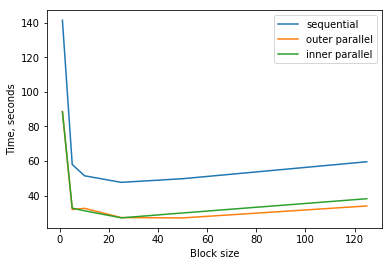

In [9]:
import numpy as np
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plot


headers = ['sequential time, s', 'parallel outer loop time, s', 'parallel inner loop time, s', 'block size']
display(Markdown('## Size of block analysis'))


file = open('E:\Work\ФПМИ\!7. Параллельные и распределённые вычисления\matrix\lab1\output.txt', 'r')
for line in file:
    dimension, rows = map(int, line.split())
    title = 'matrix {}x{}'.format(dimension, dimension)
    display(Markdown('### {}'.format(title)))
    table = [file.readline().split() for _ in range(rows)]
    display(Markdown(tabulate(table, headers, tablefmt='html')))

    data = np.array(table)
    labels = ['sequential', 'outer parallel', 'inner parallel']
    block_sizes = list(map(int, data[:,3]))
    plot.xlabel('Block size')
    plot.ylabel('Time, seconds')
    plots = []
    for i in range(0, 3):
        plots.append(plot.plot(block_sizes,  list(map(float, data[:,i])), label=labels[i])[0])
    plot.legend(handles=plots)
    plot.show()